In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob
import plotly.express as px
import os
import seaborn as sns; sns.set_theme()
from posicionamento import posicionamento_partidos

In [2]:
all_files = glob.glob(os.path.join("dados/orientacoes/*.csv"))
all_files
li = []

for file in all_files:
    dfo = pd.read_csv(file, index_col=None, header=0, sep=";")
    li.append(dfo)

dfo = pd.concat(li, axis=0, ignore_index=True)
dfo = dfo.drop(["uriVotacao", "descricao", "uriBancada", "siglaOrgao"], axis=1)
print(dfo.columns)
dfo

Index(['idVotacao', 'siglaBancada', 'orientacao'], dtype='object')


,idVotacao,siglaBancada,orientacao
0,140406-31,PSB,Não
1,140406-31,PP,Não
2,140406-31,PV,Não
3,140406-31,PMDB,Não
4,140406-31,PSDB,Obstrução
...,...,...,...
76064,2312874-9,MDB,Sim
76065,2312874-9,Podemos,Liberado
76066,2312874-9,Patriota,NaN
76067,2312874-9,PCdoB,Não


In [ ]:
all_files = glob.glob(os.path.join("dados/votos/*.csv"))
all_files
li = []

for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0, sep=";")
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df

In [ ]:
df["dataHoraVoto"] = pd.to_datetime(df['dataHoraVoto'])
df

In [ ]:
df = df.drop(["uriVotacao", "deputado_uri", "deputado_uriPartido", "deputado_urlFoto", "deputado_idLegislatura"], axis=1)
df["voto"].replace({"Sim": 1, "Não": -1, "Abstenção": 0, 'Artigo 17':0, 'Obstrução':0, 
                    "Favorável com restrições":0, "Branco":0}, inplace=True)
df["voto_count"] = 1
df

In [91]:
dv = pd.merge(df, dfo, how='left', left_on=['idVotacao','deputado_siglaPartido'], right_on=['idVotacao','siglaBancada'])
dv = dv.drop(["siglaBancada"], axis=1)
dv_nan = dv[dv["voto"].isnull()].groupby("idVotacao").count()
dv = dv[~dv["idVotacao"].isin(dv_nan.index)]
dv["posicionamento"] = dv["deputado_siglaPartido"]
dv["posicionamento"].replace(posicionamento_partidos, inplace=True)
dv

,idVotacao,dataHoraVoto,voto,deputado_id,deputado_nome,deputado_siglaPartido,deputado_siglaUf,voto_count,orientacao,posicionamento
0,37897-3,2001-12-11 19:49:15,1,73886,Adão Pretto,PT,RS,1,NaN,Esquerda
1,37897-3,2001-12-11 19:29:35,1,74328,Adauto Pereira,PFL,PB,1,NaN,Centro-direita
2,37897-3,2001-12-11 19:26:34,1,74450,Adolfo Marinho,PSDB,CE,1,NaN,Centro
3,37897-3,2001-12-11 19:25:14,0,74646,Aécio Neves,PSDB,MG,1,NaN,Centro
4,37897-3,2001-12-11 19:26:59,1,73765,Affonso Camargo,PFL,PR,1,NaN,Centro-direita
...,...,...,...,...,...,...,...,...,...,...
1329477,945554-186,2022-04-07 13:21:12,1,178889,Zé Carlos,PT,MA,1,Sim,Esquerda
1329478,945554-186,2022-04-07 13:22:05,1,204559,Zé Neto,PT,BA,1,Sim,Esquerda
1329479,945554-186,2022-04-07 13:26:44,-1,160632,Zé Silva,SOLIDARIEDADE,MG,1,NaN,Centro
1329480,945554-186,2022-04-07 13:21:07,-1,204517,Zé Vitor,PL,MG,1,Não,Centro-direita


In [31]:
dv.columns = ['idVotacao', 'data', 'voto', 'id', 'nome',
       'partido', 'UF', 'voto_count', 'orientacao']

In [40]:
new_dv = dv.copy()
new_dv.dropna(subset = ["orientacao"], inplace=True)
new_dv["ano"] = pd.DatetimeIndex(new_dv['data']).year
new_dv["orientacao"].replace({"Sim": 1, "Não": -1, "Abstenção": 0, 'Liberado':0, 'Obstrução':0}, inplace=True)
new_dv.drop(["data"], axis=1, inplace=True)
new_dv

,idVotacao,voto,id,nome,partido,UF,voto_count,orientacao,ano
2810,113716-111,-1,73764,Abelardo Lupion,PFL,PR,1,-1,2003
2811,113716-111,1,73886,Adão Pretto,PT,RS,1,1,2003
2812,113716-111,1,74328,Adauto Pereira,PFL,PB,1,-1,2003
2813,113716-111,1,74386,Adelor Vieira,PMDB,SC,1,1,2003
2814,113716-111,1,73765,Affonso Camargo,PSDB,PR,1,1,2003
...,...,...,...,...,...,...,...,...,...
1329475,945554-186,-1,74043,Wellington Roberto,PL,PB,1,-1,2022
1329477,945554-186,1,178889,Zé Carlos,PT,MA,1,1,2022
1329478,945554-186,1,204559,Zé Neto,PT,BA,1,1,2022
1329480,945554-186,-1,204517,Zé Vitor,PL,MG,1,-1,2022


In [42]:
new_dv.query("voto != orientacao and orientacao != 0")

,idVotacao,voto,id,nome,partido,UF,voto_count,orientacao,ano
2812,113716-111,1,74328,Adauto Pereira,PFL,PB,1,-1,2003
2816,113716-111,-1,73579,Alberto Fraga,PMDB,DF,1,1,2003
2819,113716-111,-1,73477,Alceu Collares,PDT,RS,1,1,2003
2823,113716-111,-1,74057,Alice Portugal,PCdoB,BA,1,1,2003
2829,113716-111,-1,74036,Álvaro Dias,PDT,RN,1,1,2003
...,...,...,...,...,...,...,...,...,...
1329300,945554-186,-1,178931,Luciano Ducci,PSB,PR,1,1,2022
1329380,945554-186,-1,160517,Paulo Foletto,PSB,ES,1,1,2022
1329437,945554-186,1,204438,Sergio Toledo,PL,AL,1,-1,2022
1329441,945554-186,0,178946,Soraya Santos,PL,RJ,1,-1,2022


In [88]:
new_dv.groupby(by=["ano"]).sum().drop([""], axis=1)

,voto,id,voto_count,orientacao
ano,,,,
2003,2004,709583658,9575,2136
2004,268,1639628215,22132,134
2005,652,1218094210,16047,254
2006,1728,1550949968,20360,1395
2007,-2320,2266058893,22675,-2454
2008,-1341,1957225106,19801,-1280
2009,2903,3167862738,31330,3024
2010,5558,1584907729,15689,5380
2011,646,2819032627,23114,689


In [79]:
df_heat = dv.copy()
df_heat["ano"] = pd.DatetimeIndex(dv['data']).year
df_heat.drop(["orientacao", "data", "voto_count", "UF", "nome", "id"], axis=1, inplace=True)
heat = df_heat.groupby(["partido", "ano"], as_index=False).sum()
#heat = heat.query("ano > 2015 and ano < 2019")
heat

,partido,ano,voto
0,AVANTE,2017,44
1,AVANTE,2018,20
2,AVANTE,2019,-1
3,AVANTE,2020,-31
4,AVANTE,2021,495
...,...,...,...
512,SOLIDARIEDADE,2019,-103
513,SOLIDARIEDADE,2020,-28
514,SOLIDARIEDADE,2021,853
515,SOLIDARIEDADE,2022,247


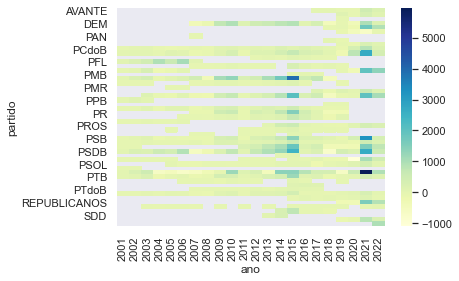

In [80]:
flights = sns.load_dataset("flights")
heat = heat.pivot("partido", "ano", "voto")
ax = sns.heatmap(heat, cmap="YlGnBu")

In [82]:
#heat = heat.pivot("partido", "ano", "voto")
fig = px.imshow(heat)
fig.show()

In [22]:
dv["orientacao"] = dv["orientacao"].fillna("Sem dados")
dv["orientacao"].unique()

array(['Sem dados', 'Não', 'Sim', 'Obstrução', 'Liberado', 'Abstenção'],
      dtype=object)

In [12]:
votacoes = dv.groupby(by=["idVotacao"]).sum().drop(["id", "voto_count"], axis=1)
votacoes

,voto
idVotacao,
101666-71,333
104342-141,180
104342-99,-170
104485-117,20
104509-28,3
...,...
996553-34,-101
996553-39,23
996553-43,88


In [13]:
neo_df = dv.query("partido == 'PT'")
neo_df = neo_df.groupby(["idVotacao", "partido"]).sum()
neo_df = neo_df.drop(["id", "voto_count"], axis=1)
neo_df = neo_df.sort_values("voto")

In [14]:
merge_df = neo_df.merge(votacoes, left_on="idVotacao", right_on="idVotacao")
merge_df["voto_y"] = np.where(merge_df['voto_y'] > 0, 1, 0)
merge_df["voto_x"] = np.where(merge_df['voto_x'] > 0, 1, 0)
merge_df

,voto_x,voto_y
idVotacao,,
282740-60,0,0
562615-106,0,0
277133-92,0,0
562615-93,0,0
277133-117,0,0
...,...,...
252972-101,1,1
590335-46,1,1
113717-184,1,1


In [15]:
merge_df.groupby(["voto_x", "voto_y"]).size()

voto_x  voto_y
0       0         1031
        1          914
1       0          706
        1         1286
dtype: int64

In [16]:
new_df = dv.groupby(["partido"]).sum()
new_df = new_df.drop(["id", "voto_count"], axis=1)
new_df = new_df.reset_index(level=0)
new_df = new_df.sort_values("voto")
new_df

,partido,voto
5,NOVO,-1165
7,PATRI,-25
22,PPL,-13
2,DC,-6
18,PMR,2
6,PAN,5
37,PST,6
15,PMB,12
40,PTC,45
46,S.PART.,48


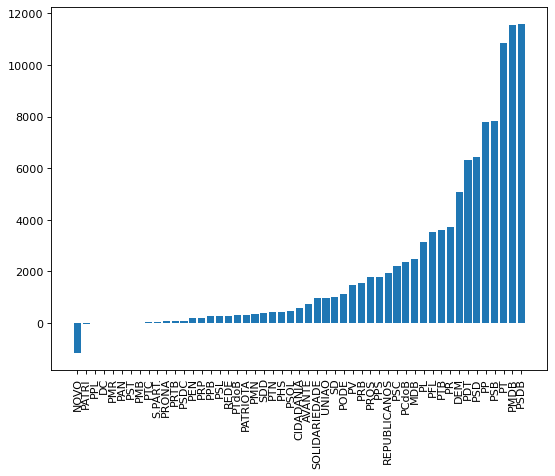

In [17]:
figure(figsize=(8, 6), dpi=80)
plt.xticks(rotation=90)
plt.bar(new_df["partido"], new_df["voto"])
plt.show()